In [8]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error

In [3]:
X = loadmat("Indian_pines.mat")["indian_pines"]
y = loadmat("Indian_pines_gt.mat")["indian_pines_gt"]
print(f"Indian_Pines: {X.shape} \nGround_Truth: {y.shape}")

Indian_Pines: (145, 145, 220) 
Ground_Truth: (145, 145)


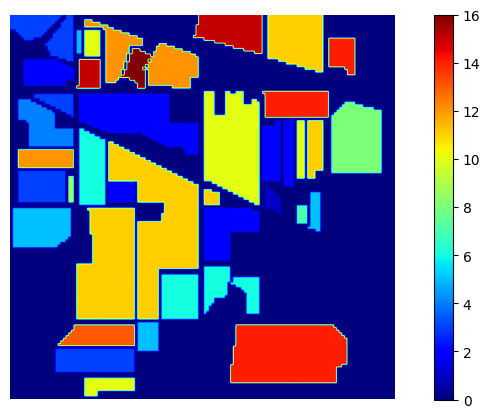

In [4]:
#visualizing of groundtruth
plt.figure(figsize = (10, 5))
plt.imshow(y, cmap = "jet")
plt.axis("off")
plt.colorbar()
plt.show()

In [5]:
def extract_pixels(X, y):

  data = X.reshape(-1, X.shape[2])
  pines = pd.DataFrame(data = data)
  pines = pd.concat([pines, pd.DataFrame(data = y.ravel())], axis = 1)
  pines.columns= [f"band{i}" for i in range(1, 1+X.shape[2])] + ["class"]
  pines.to_csv("Dataset.csv")
  return pines

pines = extract_pixels(X, y)
print(pines.head())
print(pines.shape)

   band1  band2  band3  band4  band5  band6  band7  band8  band9  band10  ...  \
0   3172   4142   4506   4279   4782   5048   5213   5106   5053    4750  ...   
1   2580   4266   4502   4426   4853   5249   5352   5353   5347    5065  ...   
2   3687   4266   4421   4498   5019   5293   5438   5427   5383    5132  ...   
3   2749   4258   4603   4493   4958   5234   5417   5355   5349    5096  ...   
4   2746   4018   4675   4417   4886   5117   5215   5096   5098    4834  ...   

   band212  band213  band214  band215  band216  band217  band218  band219  \
0     1090     1112     1090     1062     1069     1057     1020     1020   
1     1104     1117     1091     1079     1085     1064     1029     1020   
2     1114     1114     1100     1065     1092     1061     1030     1016   
3     1108     1109     1109     1071     1088     1060     1030     1006   
4     1107     1112     1094     1072     1087     1052     1034     1019   

   band220  class  
0     1005      3  
1     1000

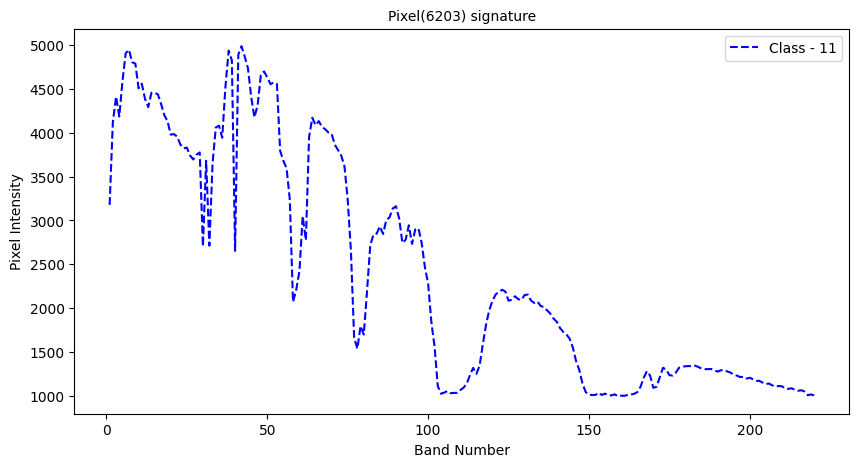

In [8]:
def plot_signature(pines):
    plt.figure(figsize = (10, 5))
    pixel_no = np.random.randint(pines.shape[0])
    plt.plot(range(1, 221), pines.iloc[pixel_no, :-1].values.tolist(), "b--", label = f"Class - {pines.iloc[pixel_no, -1]}")
    plt.legend()
    plt.title(f"Pixel({pixel_no}) signature", fontsize = 10)
    plt.xlabel("Band Number", fontsize = 10)
    plt.ylabel("Pixel Intensity", fontsize = 10)
    plt.show()

plot_signature(pines)

# New Section

In [10]:
#Principal Component Analysis(PCA)

from sklearn.decomposition import PCA

pca = PCA(n_components = 40)
data = pca.fit_transform(pines)
p_data = pd.concat([pd.DataFrame(data = data), pd.DataFrame(data = y.ravel())], axis = 1)
p_data.columns = [f"PC-{i}" for i in range(1,41)] + ["class"]
p_data.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37,PC-38,PC-39,PC-40,class
0,5014.889621,1456.882767,72.764653,71.194784,-435.669393,-68.874166,134.810598,-304.342673,256.415778,-66.616765,...,20.231461,-1.544860,19.295705,-19.893122,-32.749861,27.621362,7.565912,59.306355,5.282983,3
1,5601.365586,-2023.433383,350.191199,-528.454165,148.147037,-288.419906,202.933834,240.898775,-474.868646,93.477735,...,100.794219,-80.331732,-52.674118,29.575072,11.591203,-23.539610,1.906459,11.930433,40.250196,3
2,5796.144588,-3090.383087,490.559777,-760.172999,260.008861,-131.626721,172.950525,205.913460,572.487543,-191.608330,...,35.815903,-36.118683,-14.921496,20.158575,33.339612,-16.092940,-17.269014,-39.282977,84.820019,3
3,5586.192093,-2369.357337,356.363370,-502.669571,146.576480,-306.645728,251.085255,234.993681,-314.016282,54.957783,...,129.161671,-64.946694,34.860912,20.759329,61.305559,-7.688374,-46.879176,-1.947310,56.237523,3
4,5020.998183,339.605131,-23.003144,-92.573456,-368.477812,-438.289406,502.716726,-345.504359,-188.364920,-67.486840,...,-82.885846,71.867372,184.379840,-8.847781,-20.809097,-10.534946,5.787555,56.203771,13.888367,3


In [18]:
x = p_data[p_data["class"] != 0]
X = x.iloc[:, :-1].values
y = x.loc[:, "class"].values

In [11]:


names = ["Alfalfa", "Corn-notill", "Corn-mintill", "Corn", "Grass-pasture", "Grass-trees", "Grass-pasture-mowed", "Hay-windrowed", "Oats", "Soybean-notill", "Soybean-mintill", "Soybean-clean", "Wheat", "Woods", "Buildings-Grass-Trees-Drives", "Stone-Steel-Towers"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11, stratify = y)
svm =  SVC(C = 100, kernel = "rbf", cache_size = 10*1024)
svm.fit(X_train, y_train)

SVC(C=100, cache_size=10240)

In [13]:
X_train_prediction = svm.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print("Accuracy score of the training data is: ", training_data_accuracy)
y_prediction = svm.predict(X_test)
test_data_accuracy = accuracy_score(y_prediction, y_test)
print("Accuracy score of the test data is: ", test_data_accuracy)

Accuracy score of the training data is:  0.9235272594218807
Accuracy score of the test data is:  0.8863414634146342


<ipython-input-15-f6c723cfb04c>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clmap = np.array(l).reshape(145, 145).astype("float")


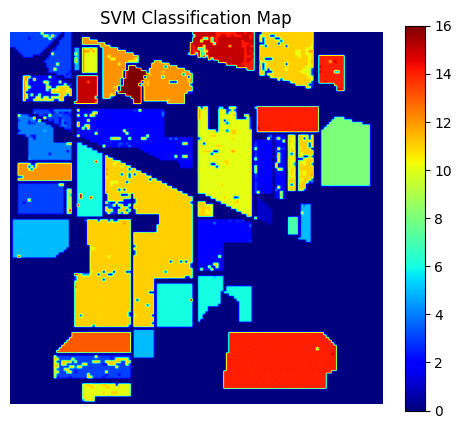

In [15]:
l =[]

for i in range(p_data.shape[0]):
    if p_data.iloc[i, -1] == 0:
        l.append(0)
    else:
        l.append(svm.predict(p_data.iloc[i, :-1].values.reshape(1, -1)))
plt.figure(figsize = (6, 5))
clmap = np.array(l).reshape(145, 145).astype("float")
plt.imshow(clmap, cmap = "jet")
plt.colorbar()
plt.axis("off")
plt.title("SVM Classification Map")
plt.savefig("svm_classification_map.png")
plt.show()